# Loyalty Program Analysis 

This analysis is for a building material retailer called Homeworld. We were tasked to determine if the loyalty program helped boost purchased when it was introduced. We will do some data pre-processing, EDA, and also test whether the loyaltry program increased revenue. 

#### References: 
- [Changing column names (Pandas)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)
- [Changing datatype to int (Numpy](https://numpy.org/doc/stable/reference/generated/numpy.array.html)
- [Changing datatype to datetime (Pandas)](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
- [Merging dataframres (Pandas)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
- [Plotting histogram (Matplotlib)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
- [Plotting lineplot (Seaborn)](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
- [Plotting barplot (Seaborn)](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Plotting a heatmap (Seaborn)](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
- [For loops (Python)](https://www.learnpython.org/en/Loops)
- [Using two independent samples for t-test (Scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)


Link to [Presentation](https://drive.google.com/file/d/12gr1Lxq1T_fCVBplpz3EC9Zgr6HiD04j/view?usp=sharing)<br>
Link to [Dashboard](https://public.tableau.com/views/LoyaltyProgramRevenue2/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

### Description of the data

The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts. 

`retail_dataset_us.csv` contains:

- `purchaseId`
- `item_ID`
- `purchasedate`
- `Quantity` — the number of items in the purchase
- `CustomerID`
- `ShopID`
- `loyalty_program` — whether the customer is a member of the loyalty program

`product_codes_us.csv` contains:

- `productID`
- `price_per_one`

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
#reading in the data
products = pd.read_csv('product_codes_us.csv', sep=';')
retail = pd.read_csv('retail_dataset_us.csv')

In [3]:
#looking at the dataset
products.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [4]:
#changing column names to merge later
products.columns = ['item_id', 'price_per_one']

In [5]:
products.head()

,item_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [6]:
products.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


We can see the average cost for a product is 2.95. The highest cost of a product is 175. The standard deviation is 7.21 which means that there are some values far from the mean (there is some variety of prices here). 

In [7]:
#looking at the data types
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [8]:
#looking for missing values
products.isnull().sum()

item_id          0
price_per_one    0
dtype: int64

In [9]:
#looking at duplicates
products.duplicated().sum()

0

In [10]:
#making sure there are no implicit duplicates
products['item_id'].duplicated().sum()

0

In [11]:
#looking at retail dataset
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [12]:
#changing column names
retail.columns =['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'loyalty_program', 'shop_id']

In [13]:
#making sure column names are changed 
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   shop_id          105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [15]:
#changing datatypes of retail 
retail['customer_id'] = np.array(retail['customer_id'], np.int64) #changing to get rid of the decimal
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'], format='%Y-%m-%d %H:%M:%S')

In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      105335 non-null  int64         
 5   loyalty_program  105335 non-null  int64         
 6   shop_id          105335 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ MB


In [17]:
#looking at missing values
retail.isnull().sum()

purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
loyalty_program    0
shop_id            0
dtype: int64

In [18]:
retail.duplicated().sum()

1033

In [19]:
retail.duplicated().sum()/len(retail)

0.009806806854321925

In [20]:
#small amount of duplicates so, I will remove them
retail = retail.drop_duplicates()
retail.duplicated().sum()

0

In [21]:
retail.describe()

,quantity,customer_id,loyalty_program
count,104302.000000,1.043020e+05,104302.000000
mean,7.883003,-3.196549e+18,0.224464
std,329.565540,4.389216e+18,0.417231
min,-74216.000000,-9.223372e+18,0.000000
25%,0.000000,-9.223372e+18,0.000000
50%,2.000000,1.942300e+04,0.000000
75%,7.000000,2.169200e+04,0.000000
max,74214.000000,2.396200e+04,1.000000


In [22]:
#merging the two tables
df = pd.merge(products, retail, on='item_id')
df.head()

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,10002,0.85,537666,1,2016-12-07 18:36:00,-9223372036854775808,0,Shop 0
1,10002,0.85,538167,11,2016-12-09 18:58:00,20392,0,Shop 20
2,10002,0.85,541094,10,2017-01-13 13:36:00,18925,0,Shop 30
3,10002,0.85,540277,59,2017-01-06 12:18:00,19937,0,Shop 15
4,10002,0.85,538071,1,2016-12-09 14:09:00,-9223372036854775808,0,Shop 0


In [23]:
#making a column for purchase month 
df['purchase_month'] = df['purchase_date'].dt.to_period('M')
# Calculate the first day of the week by subtracting the day of the week
df['purchase_week'] = pd.to_datetime(df['purchase_date'], unit='d') - pd.to_timedelta(df['purchase_date'].dt.dayofweek, unit='d')
# Extract only the date part without the time
df['purchase_week'] = df['purchase_week'].dt.date
df.head()

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week
0,10002,0.85,537666,1,2016-12-07 18:36:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05
1,10002,0.85,538167,11,2016-12-09 18:58:00,20392,0,Shop 20,2016-12,2016-12-05
2,10002,0.85,541094,10,2017-01-13 13:36:00,18925,0,Shop 30,2017-01,2017-01-09
3,10002,0.85,540277,59,2017-01-06 12:18:00,19937,0,Shop 15,2017-01,2017-01-02
4,10002,0.85,538071,1,2016-12-09 14:09:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05


In [24]:
#creating a column for total_revenue
df['total_revenue'] = df['quantity']* df['price_per_one']
df.head(10)

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue
0,10002,0.85,537666,1,2016-12-07 18:36:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85
1,10002,0.85,538167,11,2016-12-09 18:58:00,20392,0,Shop 20,2016-12,2016-12-05,9.35
2,10002,0.85,541094,10,2017-01-13 13:36:00,18925,0,Shop 30,2017-01,2017-01-09,8.50
3,10002,0.85,540277,59,2017-01-06 12:18:00,19937,0,Shop 15,2017-01,2017-01-02,50.15
4,10002,0.85,538071,1,2016-12-09 14:09:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85
5,10002,0.85,537823,0,2016-12-08 14:25:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.00
6,10002,0.85,540418,0,2017-01-07 11:04:00,-9223372036854775808,0,Shop 0,2017-01,2017-01-02,0.00
7,10002,0.85,544205,0,2017-02-17 10:31:00,-9223372036854775808,0,Shop 0,2017-02,2017-02-13,0.00
8,10002,0.85,542610,13,2017-01-30 14:05:00,18827,0,Shop 7,2017-01,2017-01-30,11.05
9,10002,0.85,541518,11,2017-01-19 09:05:00,18130,0,Shop 4,2017-01,2017-01-16,9.35


### EDA

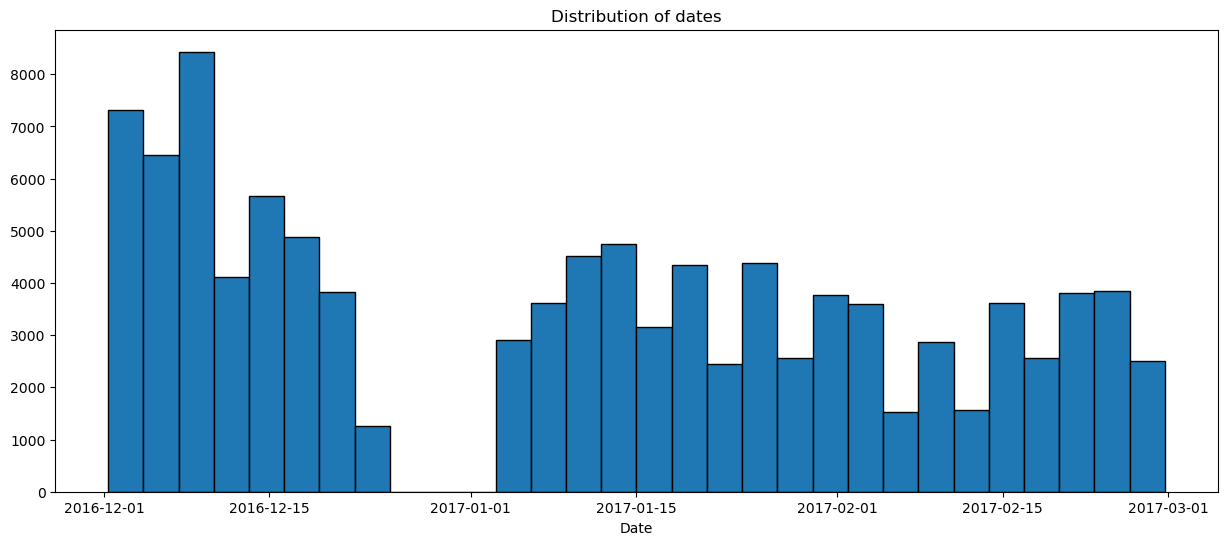

In [25]:
#looking at the dates
plt.figure(figsize=(15,6))
plt.hist(df['purchase_date'], bins=30, edgecolor='black')
plt.title('Distribution of dates')
plt.xlabel('Date')
#save figure
plt.savefig('Distribution of dates');

In [26]:
df['purchase_date'].min()

Timestamp('2016-12-01 08:26:00')

In [27]:
df['purchase_date'].max()

Timestamp('2017-02-28 17:04:00')

It looks like this dataset only contains data for about 3 months. The dates that occur the most are around beginning of December. There is a break at the end of December to beginning of January. Was the store closed?

In [28]:
#looking at total revenue
df['total_revenue'].sum()

975446.0600000002

In [29]:
#looking at monthly total revenue 
monthly_total_revenue = df.pivot_table(index='purchase_month', values='total_revenue', aggfunc='sum').reset_index()
monthly_total_revenue

,purchase_month,total_revenue
0,2016-12,361327.71
1,2017-01,321553.46
2,2017-02,292564.89


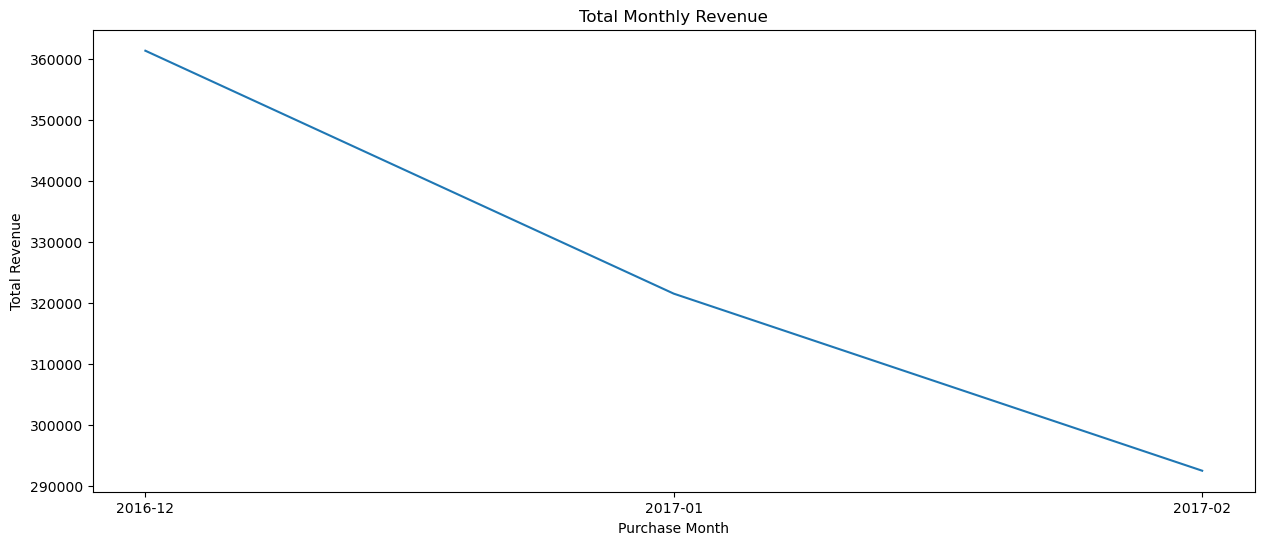

In [30]:
monthly_total_revenue['purchase_month'] = monthly_total_revenue['purchase_month'].astype(str)
plt.figure(figsize=(15,6))
sns.lineplot(data=monthly_total_revenue, x='purchase_month', y='total_revenue')
plt.title('Total Monthly Revenue')
plt.xlabel('Purchase Month')
plt.ylabel('Total Revenue');

Looking at this table and graph, we can see that the highest total revenue occurs in December. The revenue starts to decrease month to month afterwards.

In [31]:
weekly_total_revenue = df.pivot_table(index='purchase_week', values='total_revenue', aggfunc='sum').reset_index()
weekly_total_revenue

,purchase_week,total_revenue
0,2016-11-28,68169.01
1,2016-12-05,144549.81
2,2016-12-12,109415.95
3,2016-12-19,39192.94
4,2017-01-02,63994.17
5,2017-01-09,104606.22
6,2017-01-16,72417.05
7,2017-01-23,65975.15
8,2017-01-30,68784.41
9,2017-02-06,57430.24


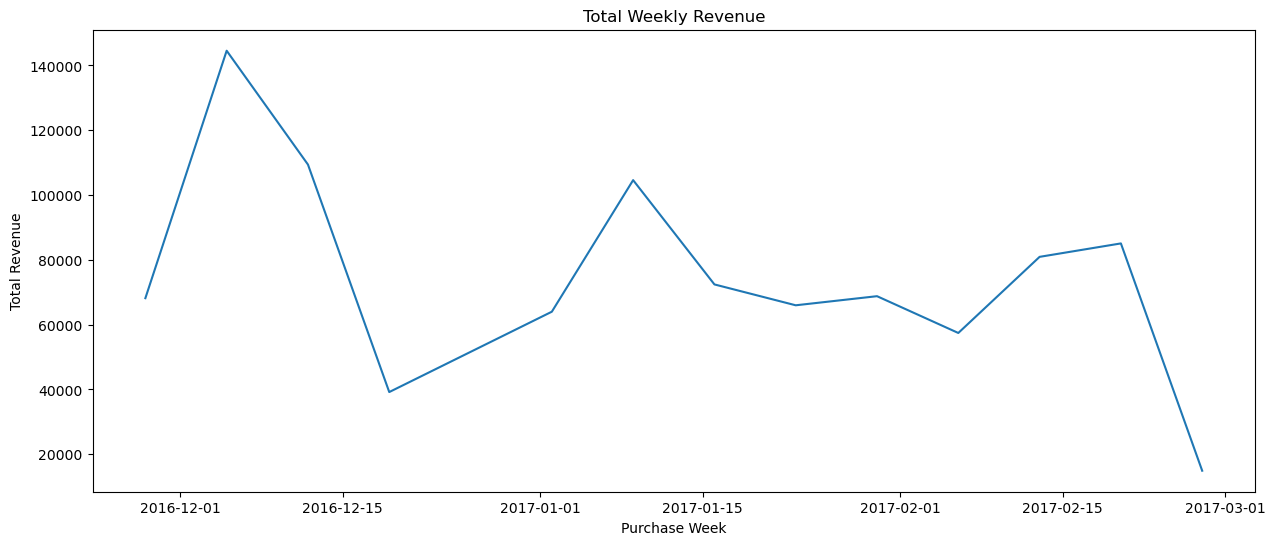

In [32]:
plt.figure(figsize=(15,6))
sns.lineplot(data=weekly_total_revenue, x='purchase_week', y='total_revenue')
plt.title('Total Weekly Revenue')
plt.xlabel('Purchase Week')
plt.ylabel('Total Revenue');

We can see from this graph that the highest sales occur in December, which coincides with the larger distribution around this time. Sales really dip at the end of the graph which coincides with the last week of February being the week with the lowest amount of sales. 

In [33]:
#looking at the revenue per month for each shop 
shop_rev_per_month = df.groupby(['shop_id','purchase_month'])['total_revenue'].sum().reset_index()
shop_rev_per_month

,shop_id,purchase_month,total_revenue
0,Shop 0,2016-12,52321.20
1,Shop 0,2017-01,36446.78
2,Shop 0,2017-02,16403.60
3,Shop 1,2016-12,5447.02
4,Shop 1,2017-01,9193.35
...,...,...,...
88,Shop 8,2017-01,5417.70
89,Shop 8,2017-02,13458.09
90,Shop 9,2016-12,8493.34
91,Shop 9,2017-01,5720.44


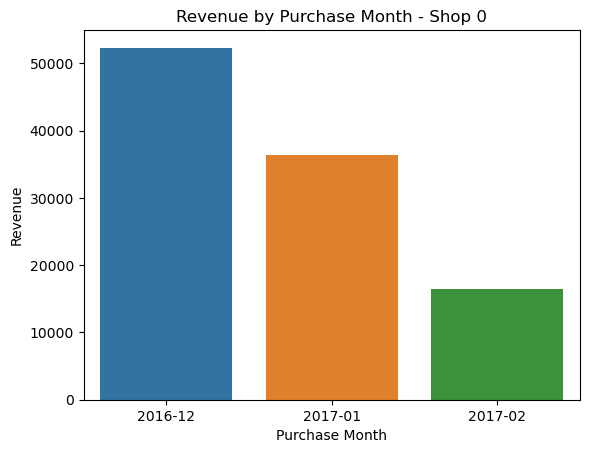

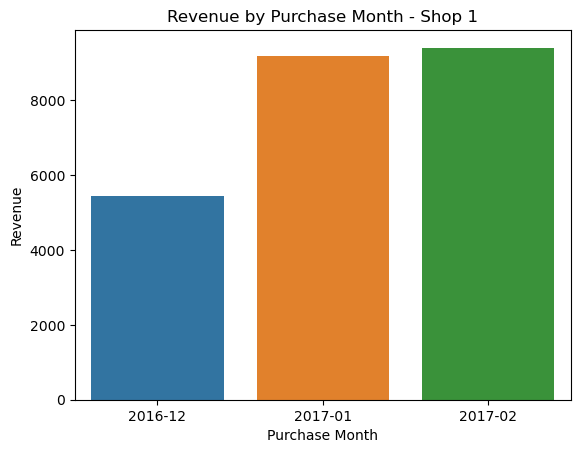

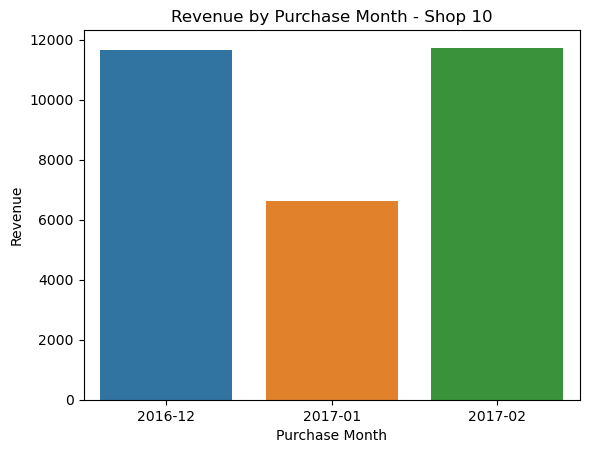

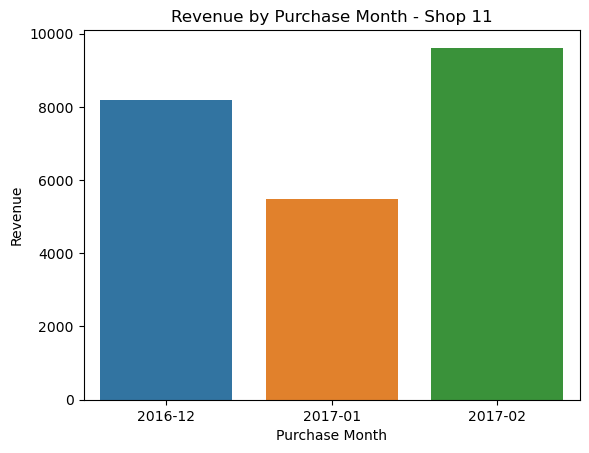

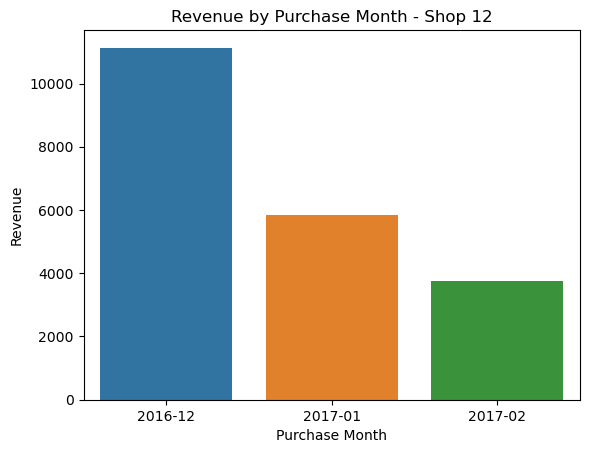

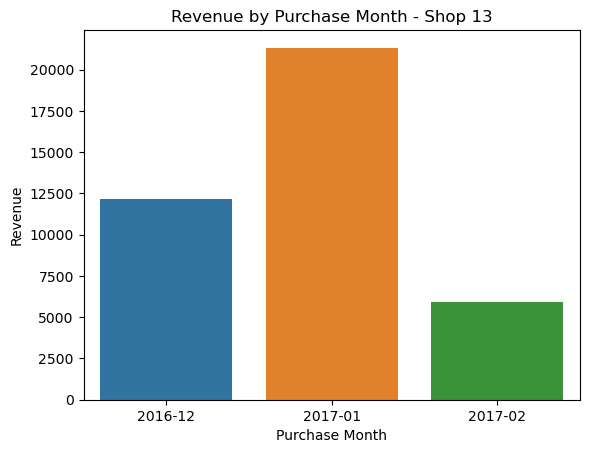

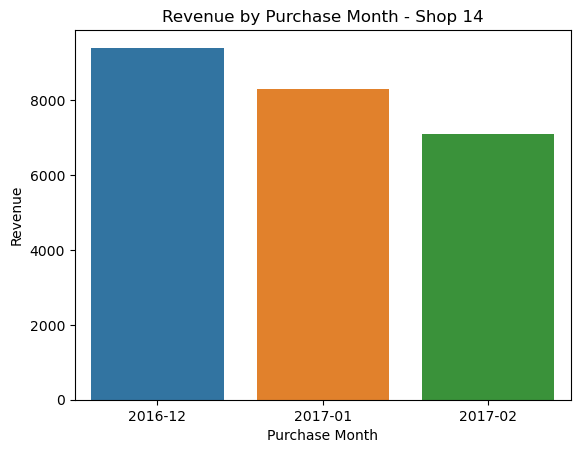

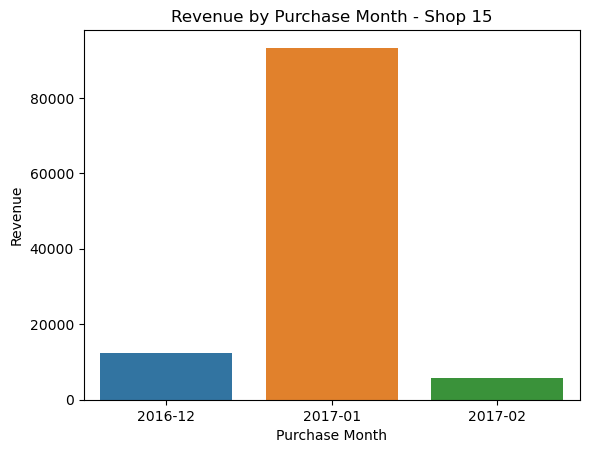

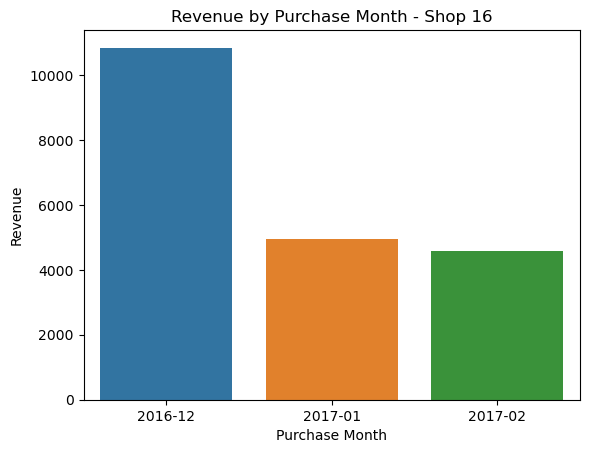

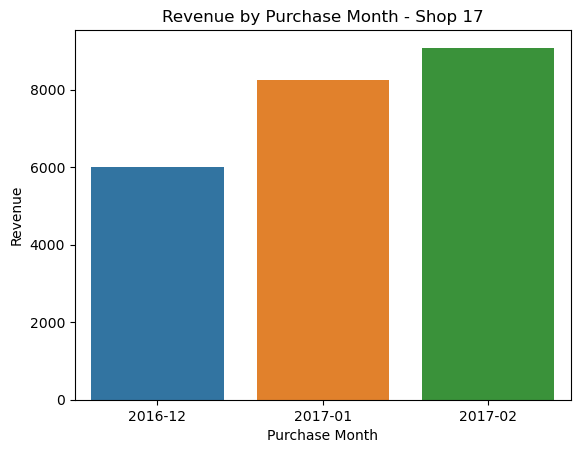

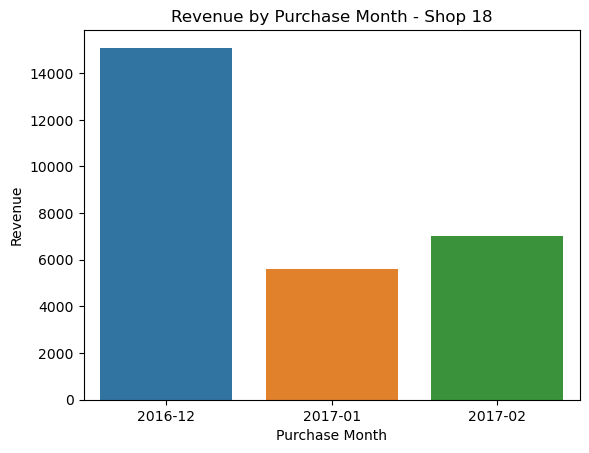

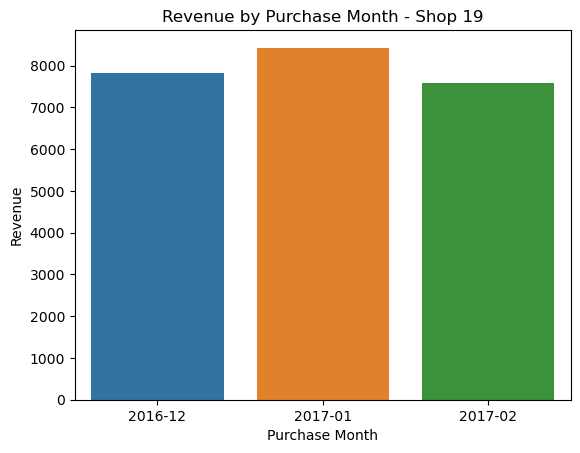

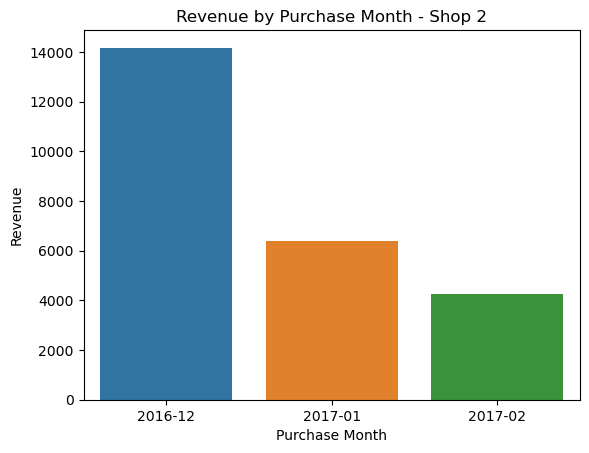

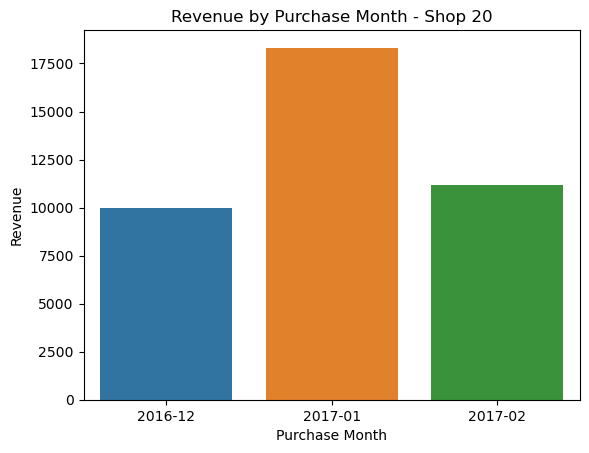

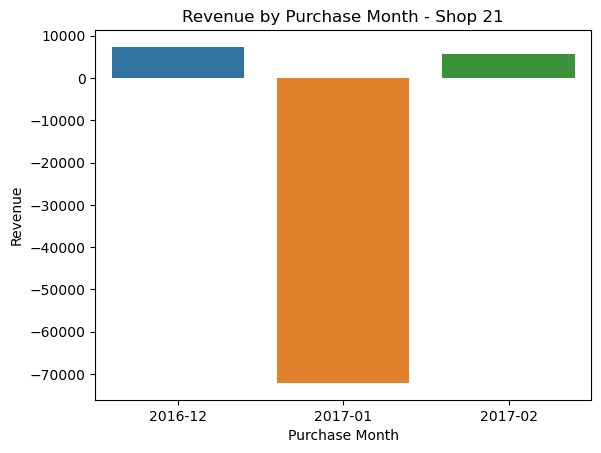

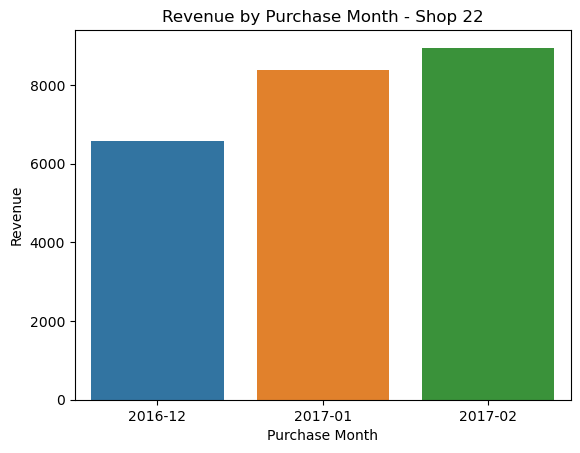

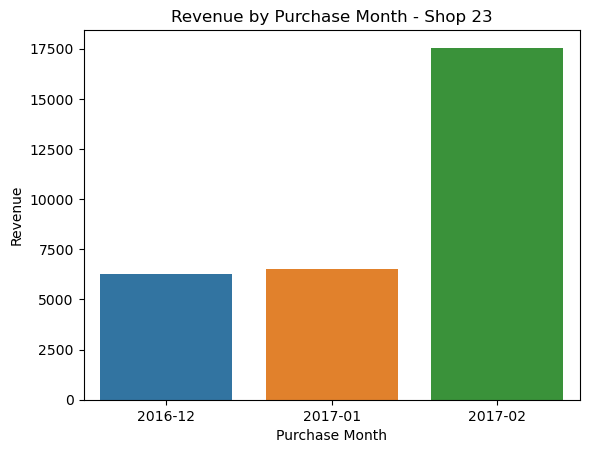

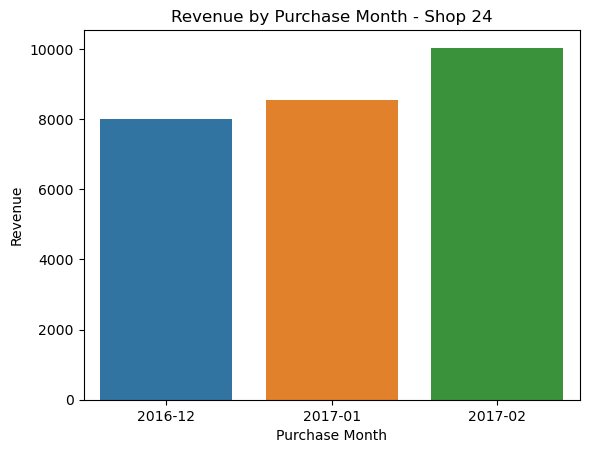

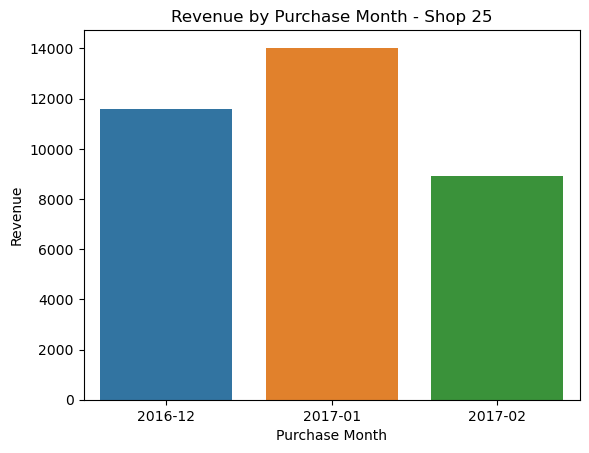

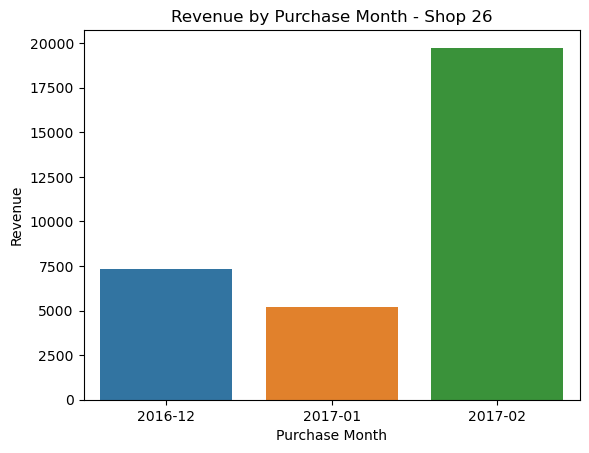

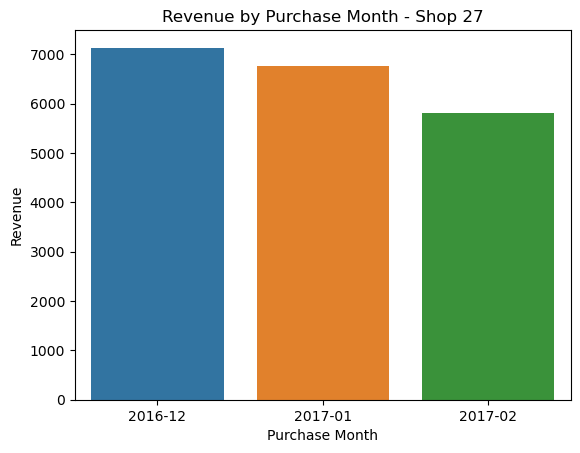

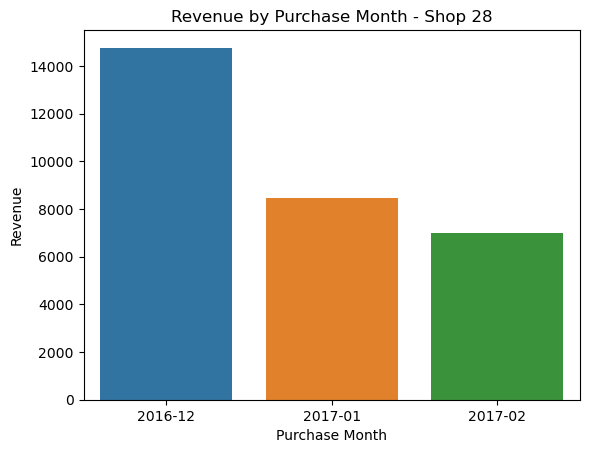

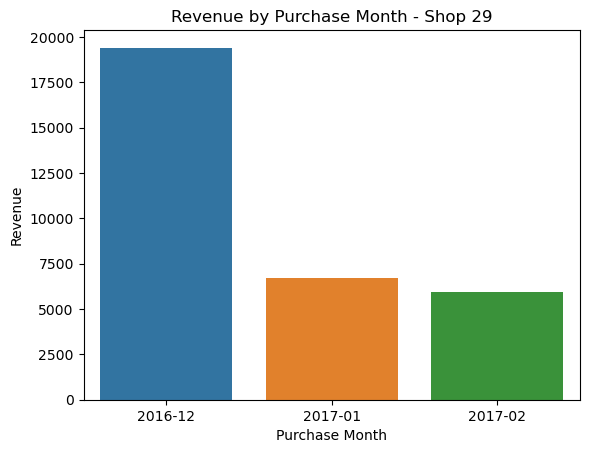

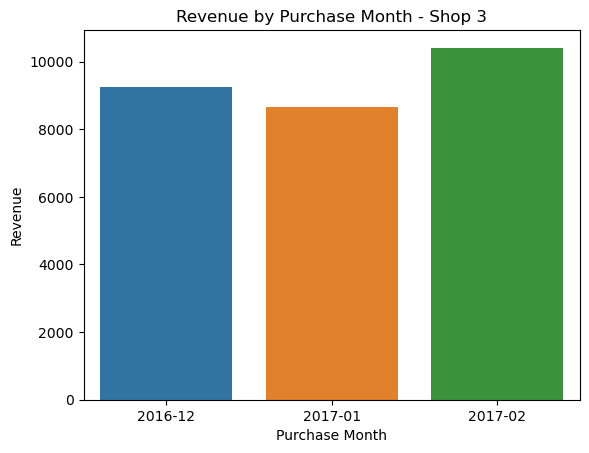

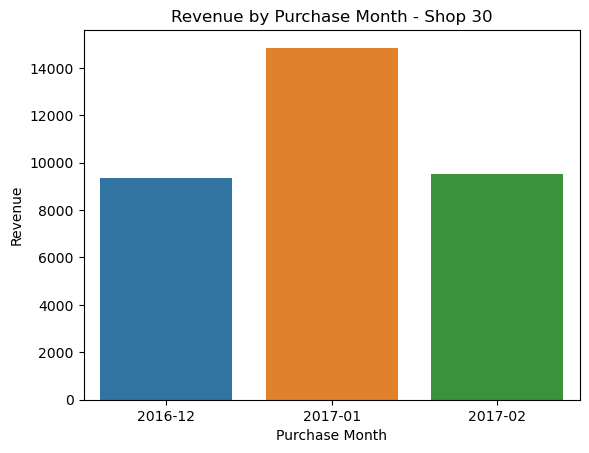

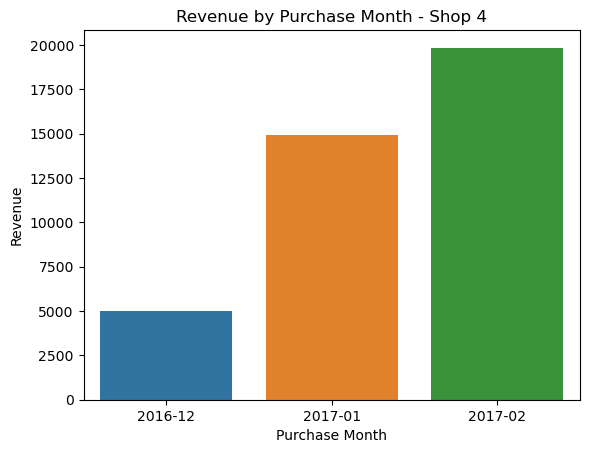

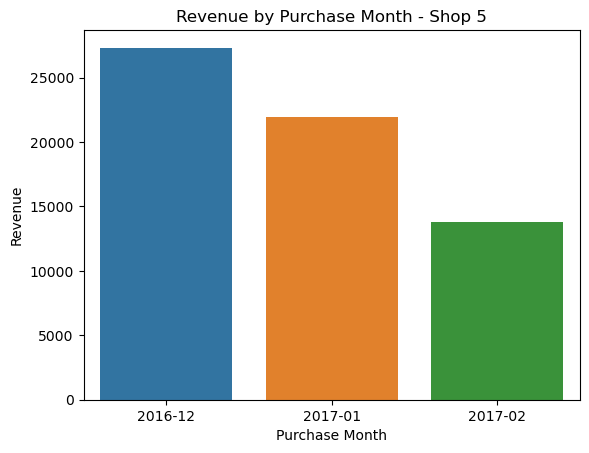

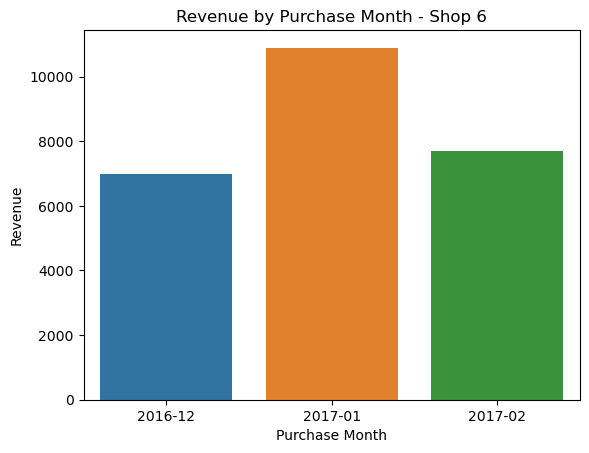

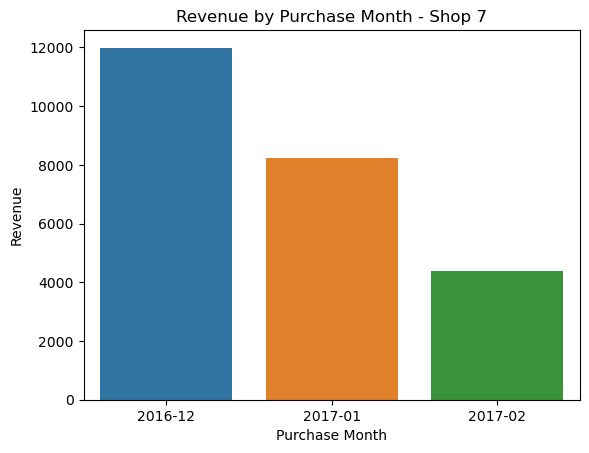

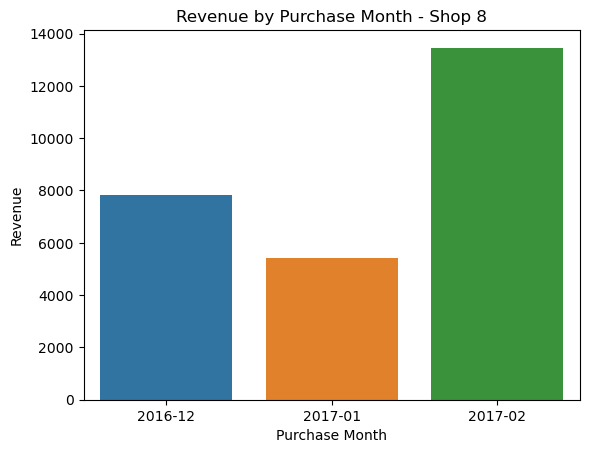

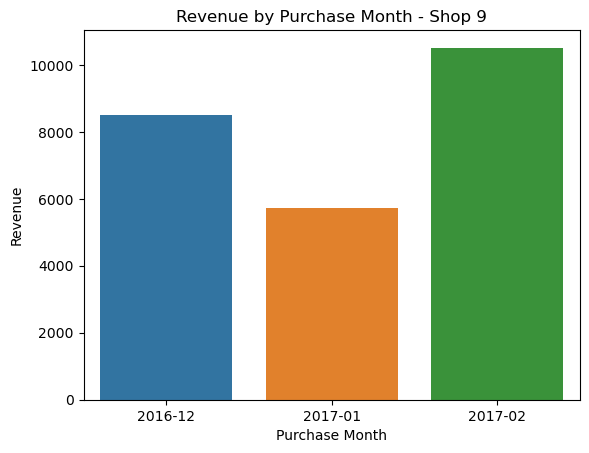

In [34]:
#getting each shop id
unique_shops = shop_rev_per_month['shop_id'].unique()

# Loop through each shop and plot the bar graph
for shop in unique_shops:
    # Filter the data for the current shop
    shop_data = shop_rev_per_month[shop_rev_per_month['shop_id'] == shop]
    
    # Plot the bar graph for the current shop
    plt.figure()  # Create a new figure for each shop
    sns.barplot(data=shop_data, x='purchase_month', y='total_revenue')
    
    # Set labels and title
    plt.xlabel('Purchase Month')
    plt.ylabel('Revenue')
    plt.title(f'Revenue by Purchase Month - {shop}')
    
    # Display the plot
    plt.show()

Most shops tend make more sales in December. We can also see that some shops even do better in January than other months. Shop 21 has majority negative sales in January.

In [35]:
df.groupby('shop_id')['total_revenue'].sum().sort_values(ascending=False)

shop_id
Shop 15    111537.83
Shop 0     105171.58
Shop 5      63046.14
Shop 4      39778.52
Shop 20     39468.26
Shop 13     39407.76
Shop 25     34496.92
Shop 30     33726.79
Shop 26     32258.18
Shop 29     32034.20
Shop 23     30360.23
Shop 28     30217.95
Shop 10     30002.04
Shop 3      28301.64
Shop 18     27709.57
Shop 8      26704.05
Shop 24     26604.29
Shop 6      25571.90
Shop 14     24811.34
Shop 2      24798.92
Shop 9      24725.67
Shop 7      24597.39
Shop 1      24043.83
Shop 22     23911.13
Shop 19     23844.42
Shop 17     23326.33
Shop 11     23264.34
Shop 12     20727.31
Shop 16     20361.03
Shop 27     19710.59
Shop 21    -59074.09
Name: total_revenue, dtype: float64

It seems there are about 30 shops. Shop 15 seems to be the shop that makes the most sales overall followed by Shop 0 and Shop 5. Shop 21 has in the negative with -59,074 dollars.

In [36]:
#looking at unique values
df['loyalty_program'].unique()

array([0, 1], dtype=int64)

In [37]:
print(f"There are {len(df.query('loyalty_program == 1')) / len(df) *100: .2f}% members in the loyalty program.")

There are  22.45% members in the loyalty program.


In [38]:
print(f"The rest, {len(df.query('loyalty_program == 0')) / len(df) *100: .2f}%, are not part of the loyalty program.")

The rest,  77.55%, are not part of the loyalty program.


In [39]:
loyal = df.query('loyalty_program == 1')
loyal.head(2)

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue
14,10002,0.85,540798,11,2017-01-11 12:11:00,23044,1,Shop 8,2017-01,2017-01-09,9.35
15,10002,0.85,538853,3,2016-12-14 13:35:00,22484,1,Shop 18,2016-12,2016-12-12,2.55


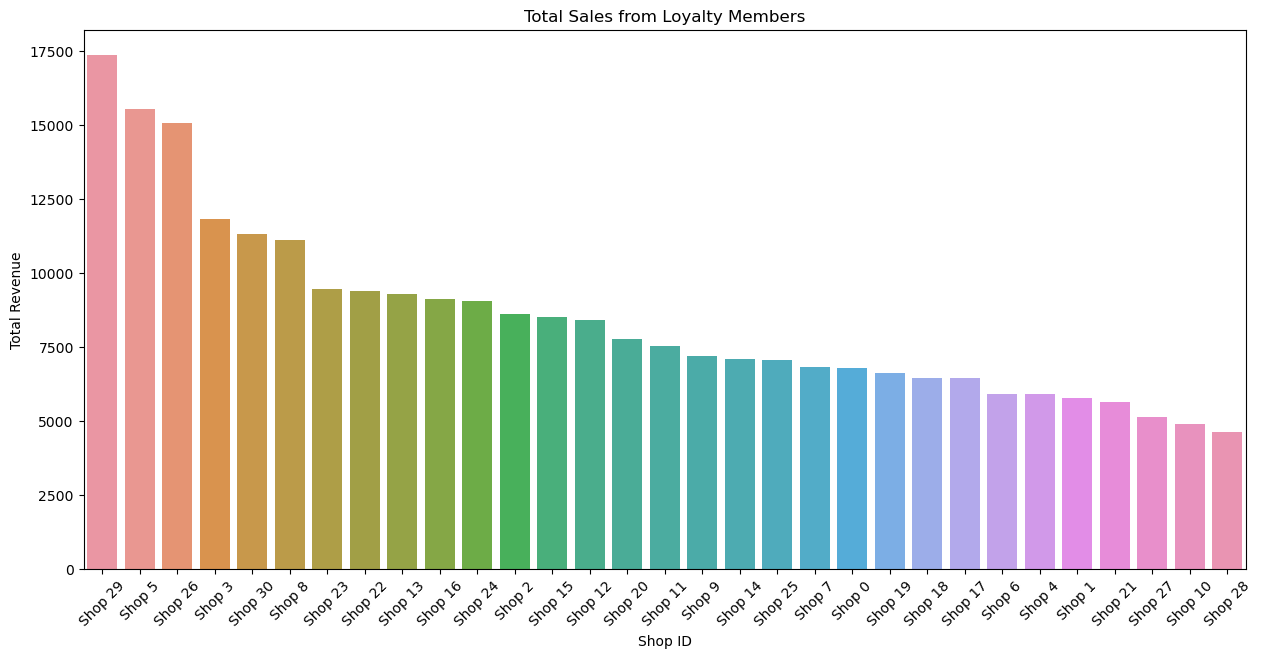

In [40]:
#looking at sales only from loyalty members
loyal_sales = loyal.groupby('shop_id')['total_revenue'].sum().sort_values(ascending=False).reset_index()

#plotting it
plt.figure(figsize=(15,7))
sns.barplot(data=loyal_sales, x='shop_id', y='total_revenue')
plt.title('Total Sales from Loyalty Members')
plt.xlabel('Shop ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45);

Shops 29, 5, and 26 have the highest revenue from loyalty members.

In [41]:
loyal.pivot_table(index='purchase_week', values='total_revenue', aggfunc='sum')

,total_revenue
purchase_week,
2016-11-28,17966.18
2016-12-05,54328.91
2016-12-12,27356.14
2016-12-19,7334.51
2017-01-02,12135.42
2017-01-09,19514.74
2017-01-16,11765.01
2017-01-23,14076.49
2017-01-30,27601.28


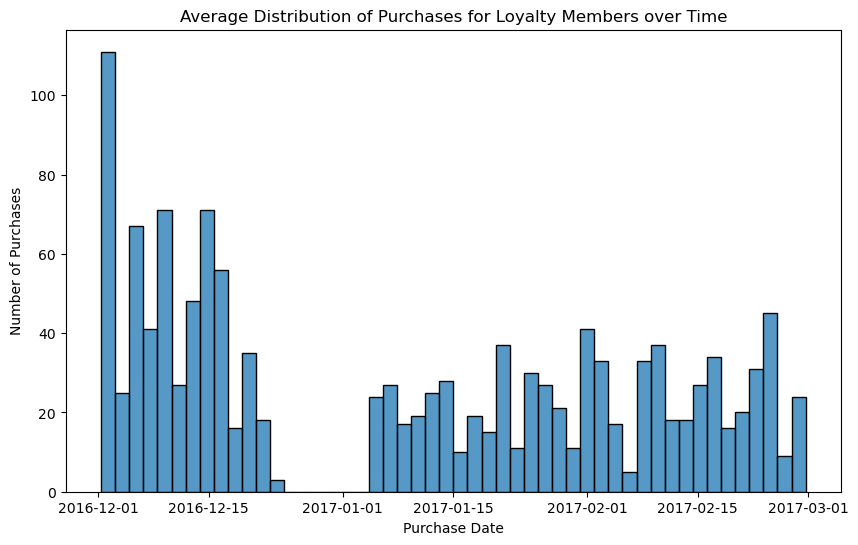

In [42]:
#looking at times that loyalty members come in to shop over time 
avg_loyal_sales = loyal.groupby('purchase_date')['total_revenue'].mean().reset_index()
avg_loyal_sales 


#plotting it
plt.figure(figsize=(10,6))
sns.histplot(data=avg_loyal_sales, x='purchase_date', bins=50)
plt.title('Average Distribution of Purchases for Loyalty Members over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Number of Purchases')
#save figure
plt.savefig('Average Distribution of Purchases for Loyalty Members over Time');

The beginning of December has a higher number of purchases. Are there pre-Christmas sales? The number of purchases after January are spotty. 

In [43]:
loyal_avg_purchase = loyal.groupby('customer_id')['total_revenue'].sum().mean()
print(f"The average purchase from a loyalty member: ${loyal_avg_purchase: .2f}.")

The average purchase from a loyalty member: $ 445.53.


In [44]:
loyal_avg_order_size = round(loyal.groupby('customer_id')['quantity'].sum().mean())
print(f"The average order size from a loyalty member is {loyal_avg_order_size}.")

The average order size from a loyalty member is 390.


In [45]:
#creating df to include only sales from non loyalty members
non_loyal = df.query('loyalty_program == 0')
non_loyal.head(2)

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue
0,10002,0.85,537666,1,2016-12-07 18:36:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85
1,10002,0.85,538167,11,2016-12-09 18:58:00,20392,0,Shop 20,2016-12,2016-12-05,9.35


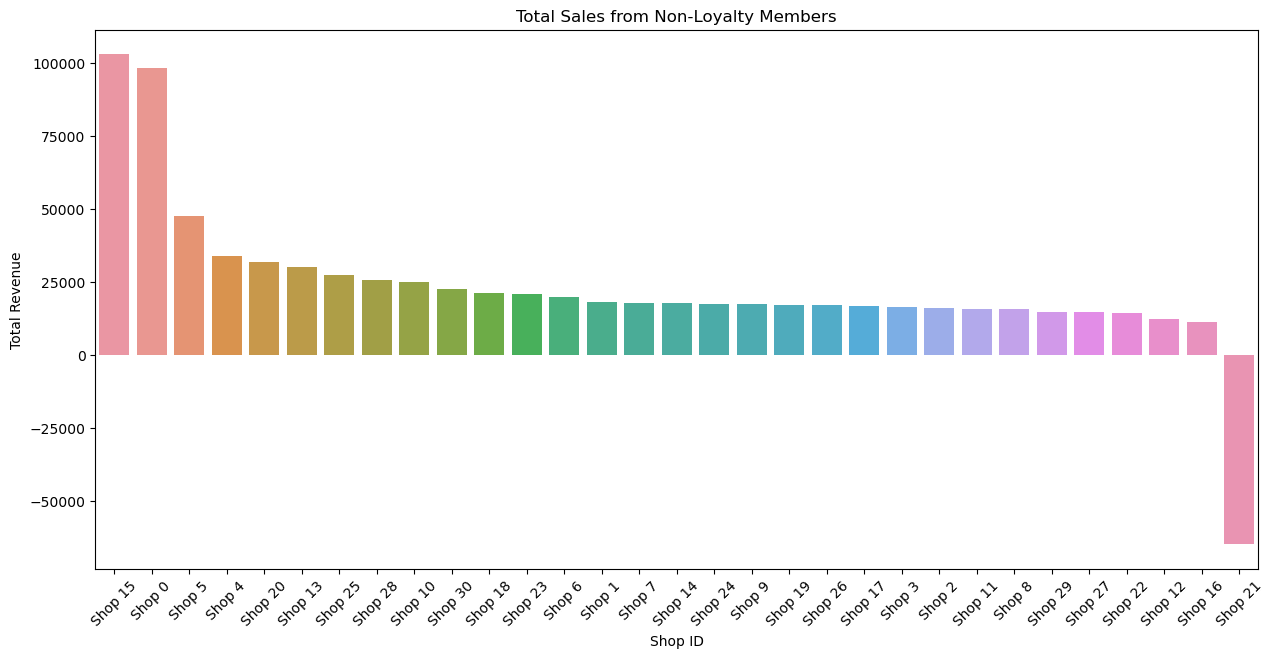

In [46]:
#looking at sales only from non loyalty members
non_loyal_sales = non_loyal.groupby('shop_id')['total_revenue'].sum().sort_values(ascending=False).reset_index()

#plotting it
plt.figure(figsize=(15,7))
sns.barplot(data=non_loyal_sales, x='shop_id', y='total_revenue')
plt.title('Total Sales from Non-Loyalty Members')
plt.xlabel('Shop ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45);

The shops who have the most sales from non-loyalty members are shops 15, 0, 5. Shop 5 has the has made it in the top sales for both loyal and non-loyal members. Shop 21 is the only store that is negative and it seems like most of the negative revenue is from non-loyal sales. We can take a closer look later.

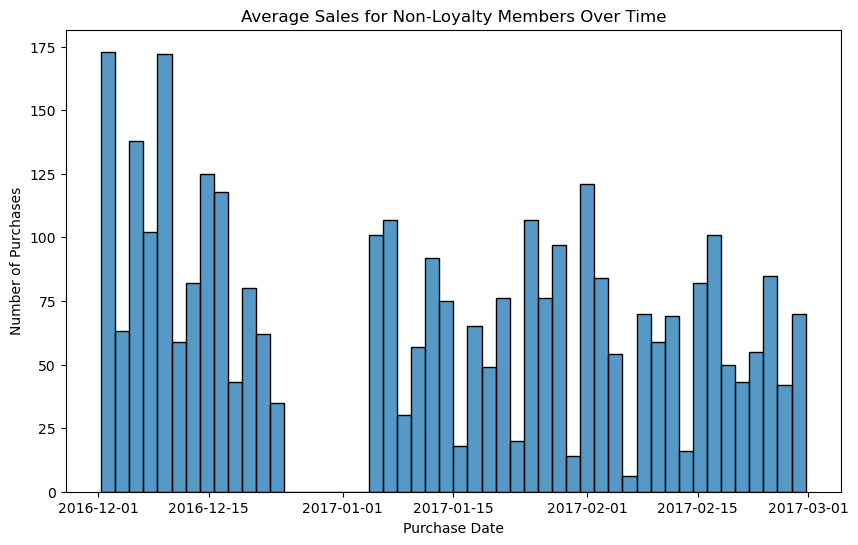

In [47]:
#looking at the average times non-loyalty members come in to shop
avg_non_loyal_sales = non_loyal.groupby('purchase_date')['total_revenue'].mean().reset_index()
avg_non_loyal_sales 

#plotting the distribution 
plt.figure(figsize=(10,6))
sns.histplot(data=avg_non_loyal_sales, x='purchase_date', bins=50)
plt.title('Average Sales for Non-Loyalty Members Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Number of Purchases')
#save figure
plt.savefig('Average Sales for Non-Loyalty Members Over Time');

The beginning of December on more days is popular for non-loyalty members. The number of purchases made after January are also sporatic but higher than loyalty members. 

In [48]:
non_loyal_avg_purchase = non_loyal.groupby('customer_id')['total_revenue'].sum().mean()
print(f"The average purchase from a non-loyalty member: ${non_loyal_avg_purchase: .2f}.")

The average purchase from a non-loyalty member: $ 613.86.


In [49]:
non_loyal_avg_order_size = round(non_loyal.groupby('customer_id')['quantity'].sum().mean())
print(f"The average order size from a non_loyalty member is {non_loyal_avg_order_size}.")

The average order size from a non_loyalty member is 510.


The average purchase size and purchase from a non-loyalty program member is higher than a loyalty member.

In [50]:
shop_21 = df.query('shop_id == "Shop 21"')
shop_21.query('total_revenue < 0')['quantity'].min()

-74216

In [51]:
shop_21.query('quantity == -74216')

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue
80225,23166,1.04,C541433,-74216,2017-01-18 10:17:00,18025,0,Shop 21,2017-01,2017-01-16,-77184.64


In [52]:
shop_21.query('item_id == "23166"')

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue
80225,23166,1.04,C541433,-74216,2017-01-18 10:17:00,18025,0,Shop 21,2017-01,2017-01-16,-77184.64


In [53]:
df.query('shop_id == "Shop 21"')['total_revenue'].sum()

-59074.09

I found that someone bought a large quantities worth of item_id 23166 on January 18, 2017 and possibly returned it. Possibly finding the reason for this return (manufacterer issue, etc) would be worth it. 

In [54]:
#calcualting percent difference between loyal and non-loyal purchases
print(f"The percent difference between loyal and non-loyal purchases: \
      {(non_loyal_avg_purchase - loyal_avg_purchase) / loyal_avg_purchase *100}: .2f")

The percent difference between loyal and non-loyal purchases:       37.782476066500244: .2f


In [55]:
#calculating the difference in order size between loyal and non-loyal purchases
print(f"The difference in order size between loyal and non-loyal purchases: \
      {non_loyal_avg_order_size - loyal_avg_order_size} items")

The difference in order size between loyal and non-loyal purchases:       120 items


In [56]:
#looking at the most popular shops overall
df['shop_id'].value_counts().sort_values(ascending=False)[:5]

Shop 0     38303
Shop 1      2689
Shop 15     2679
Shop 24     2624
Shop 22     2538
Name: shop_id, dtype: int64

Shop 0 is the most popular amond the whole dataset.

In [57]:
#looking at the most popular shops for loyalty members
loyal['shop_id'].value_counts().sort_values(ascending=False)[:5]

Shop 13    1027
Shop 2      999
Shop 24     966
Shop 1      952
Shop 11     920
Name: shop_id, dtype: int64

Shop 13 followed by 2 are the shops with the most loyalty members.

In [58]:
#looking at the most popular shops for non-loyalty members
non_loyal['shop_id'].value_counts().sort_values(ascending=False)[:5]

Shop 0     37466
Shop 15     1854
Shop 1      1737
Shop 5      1694
Shop 28     1682
Name: shop_id, dtype: int64

Shops 0 and 15 are the shops with the most non-loyalty program members.

In [59]:
loyal['total_revenue'].sum()

261525.61

In [60]:
non_loyal['total_revenue'].sum()

713920.4500000001

### EDA Conclusion:
The dataset contains data for about 3 months. The first date beginning from 12/01/2016 and ends on 02/28/2017.  There is a break at the end of December which goes into the beginning of January where there are no sales. This may be due to a store closure for the holidays. 

The highest total revenue for this store during this period occurs in December with February being the lowest, however, there is a slight peak at the beginning-mid January. 

There are about 30 shops. Most shops tend make more sales in December. We can also see that some shops even do better in January than other months. Shop 15 seems to be the shop that makes the most sales overall followed by Shop 0 and Shop 5. Shop 21 has majority negative sales in January and has an overall negative revenue of $-59,074.09. The most popular shop for is Shop 0 where the most item purchases were made overall and for non-loyal members. Shop 13 had the most items purchased from loyalty members. 

There are 22.45&#37; members in the loyalty program at this time while the rest (77.55&#37;) are not. Shops 29, 5, and 26 have the highest revenue from loyalty members. The average purchase from a loyalty member is $445.53 and ther average order size is 390 items. 

Shops with the most sales coming from non-loyalty program memberships are shops 15, 0, and 5. Shop 5 has make it both in the top sales for both loyal and non-loyal members. The average purchase from a non-loyalty purchase is \\$613.86 and the average order size is 510 items.

The percent difference between loyal and non-loyal purchases is about 37.8&#37; and the difference in order size is 120 items. The total revenue from loyal members was \\$261,525.61 while the revenue from non-loyal members was \\$713,920.45. 

We also found that Shop 21 has majority negative revenue from its non-loyal sales which happen to be from one purchase. This purchase had a listed revenue of \\$-77,184.64 for item_id 23166. The quantity of this purchase was -74,216 and its price was listed as \\$1.04. This could have actually been a return. It might be good to look into this and see why such a large amount was returned. Was this due to manufacterer defect? 

We can see at a glance that loyalty membership isn't creating a boost in revenue, but we can test this during our hypothesis testing.

### Cohort Analysis

In [61]:
user_activity = df.copy()
#ignoring the time, setting all times to midnight
user_activity['purchase_date']= user_activity['purchase_date'].dt.normalize()
#grabbing the first activity date, name the column, join with df
first_activity_date = user_activity.groupby(['customer_id'])['purchase_date'].min()
first_activity_date.name = 'first_activity_date'
user_activity = user_activity.join(first_activity_date,on='customer_id') 

In [62]:
#get user activity week from date 
user_activity['activity_week'] = pd.to_datetime(user_activity['purchase_date'], unit='d') \
- pd.to_timedelta(user_activity['purchase_date'].dt.dayofweek, unit='d')

#get week of first activity 
user_activity['first_activity_week'] = pd.to_datetime(user_activity['first_activity_date'], unit='d') \
- pd.to_timedelta(user_activity['first_activity_date'].dt.dayofweek, unit='d')

In [63]:
#calculate cohort lifetime 
user_activity['cohort_lifetime'] = (user_activity['activity_week'] - user_activity['first_activity_week'])

#divide cohort by constant, then convert to int  
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1, 'W')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int)

In [64]:
#taking a look at what we have so far
user_activity.head()

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue,first_activity_date,activity_week,first_activity_week,cohort_lifetime
0,10002,0.85,537666,1,2016-12-07,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85,2016-12-01,2016-12-05,2016-11-28,1
1,10002,0.85,538167,11,2016-12-09,20392,0,Shop 20,2016-12,2016-12-05,9.35,2016-12-09,2016-12-05,2016-12-05,0
2,10002,0.85,541094,10,2017-01-13,18925,0,Shop 30,2017-01,2017-01-09,8.50,2017-01-13,2017-01-09,2017-01-09,0
3,10002,0.85,540277,59,2017-01-06,19937,0,Shop 15,2017-01,2017-01-02,50.15,2017-01-06,2017-01-02,2017-01-02,0
4,10002,0.85,538071,1,2016-12-09,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85,2016-12-01,2016-12-05,2016-11-28,1


In [65]:
#group the data by cohort and lifetime and find the number of active users at a certain lifetime week for each cohort:
cohorts = (
    user_activity.groupby(['first_activity_week', 'cohort_lifetime'])
    .agg({'customer_id': 'nunique'})
    .reset_index()
)

#retrieve the initial number of users in a cohort
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_week', 'customer_id']
]

#rename column
inital_users_count = inital_users_count.rename(
    columns={'customer_id': 'cohort_users'}
)

#merge 
cohorts = cohorts.merge(inital_users_count, on='first_activity_week')

#calculating percent change
cohorts['churn_rate'] = cohorts.groupby(['first_activity_week'])['customer_id'].pct_change()

cohorts.head()

,first_activity_week,cohort_lifetime,customer_id,cohort_users,churn_rate
0,2016-11-28,0,256,256,NaN
1,2016-11-28,1,64,256,-0.750000
2,2016-11-28,2,68,256,0.062500
3,2016-11-28,3,25,256,-0.632353
4,2016-11-28,5,47,256,0.880000


In [66]:
#building a pivot table
churn_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='churn_rate',
    aggfunc='sum',
)

churn_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_activity_week,,,,,,,,,,,,,,
2016-11-28,0.0,-0.750000,0.062500,-0.632353,NaN,0.880000,-0.021277,-0.260870,0.058824,0.333333,-0.020833,-0.170213,0.000000,-0.717949
2016-12-05,0.0,-0.740741,-0.619048,NaN,0.275000,0.176471,-0.233333,0.239130,-0.140351,0.122449,-0.145455,-0.085106,-0.767442,NaN
2016-12-12,0.0,-0.920168,NaN,0.157895,0.181818,-0.076923,0.291667,-0.161290,-0.192308,0.333333,-0.392857,-0.705882,NaN,NaN
2016-12-19,0.0,NaN,-0.940000,0.333333,-0.250000,0.333333,0.500000,-0.333333,-0.250000,0.000000,0.000000,NaN,NaN,NaN
2017-01-02,0.0,-0.887324,-0.625000,1.666667,0.125000,-0.888889,5.000000,-0.500000,-0.333333,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.0,-0.875000,-0.142857,-0.083333,-0.363636,0.714286,0.250000,-0.866667,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-16,0.0,-0.908046,-0.750000,0.500000,1.666667,-0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-23,0.0,-0.903226,-0.500000,0.166667,-0.142857,-0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-30,0.0,-0.840336,-0.578947,-0.375000,-0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


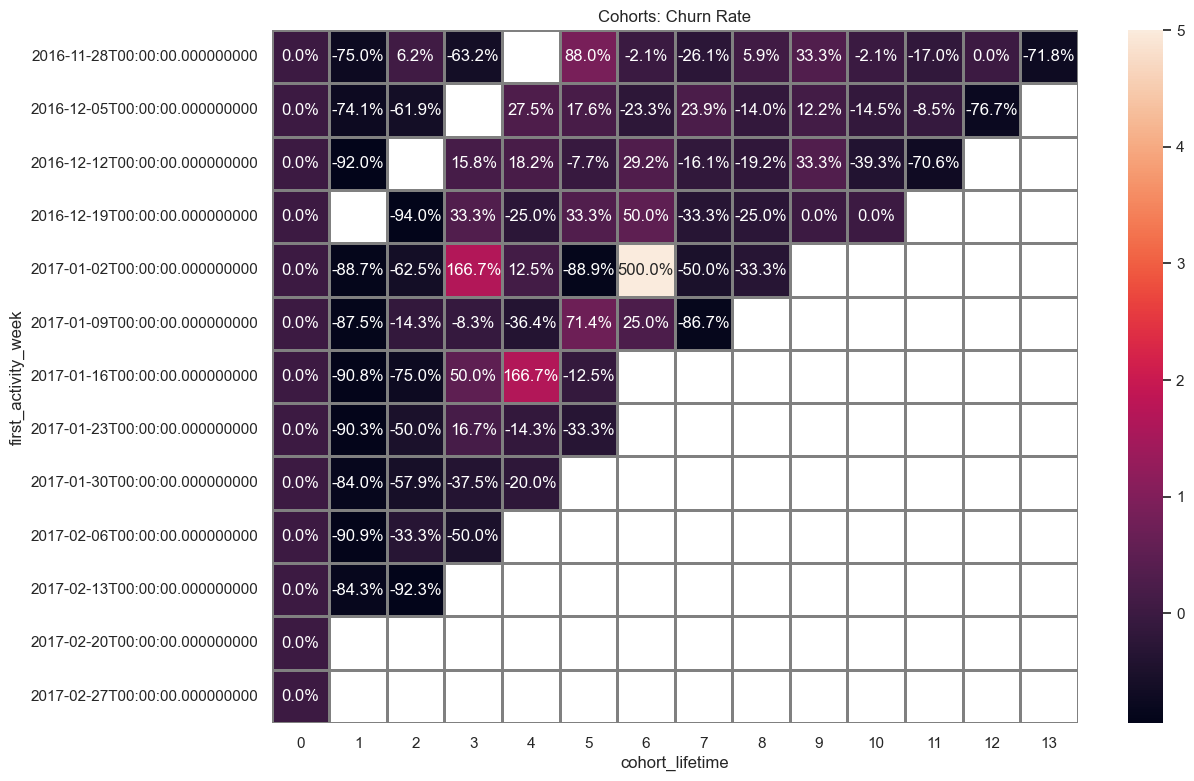

In [67]:
#plotting the heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
#save figure
plt.savefig('Cohorts: Churn Rate');

The first week the churn rate is very high. We start to see some positive numbers and less churn on the 4th week. It slowly starts to get better over time until we get to the 8th week, in which we start to see some churn even as high as 86.7 percent change. We should investigate what caused the sudden increase for the 4th week and what caused the sudden decrease in the 8th week.

### Statistical Data Analysis 
Here we would perform hypothesis testing such as :
1. A customer is less likely to churn if they are a loyalty member. 
2. Loyalty members are more likely to spend more money. 

#### Hypothesis 1: 
Null: There is no difference in churn for loyalty and non-loyalty members.<br>
Alternative: There is a difference in churn for loyalty and non-loyalty members. 

In [68]:
#merging the cohort and df using the customer_id column
merged_data = pd.merge(df, cohorts, on='customer_id', how='left')
merged_data.head()

,item_id,price_per_one,purchase_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,purchase_month,purchase_week,total_revenue,first_activity_week,cohort_lifetime,cohort_users,churn_rate
0,10002,0.85,537666,1,2016-12-07 18:36:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85,NaT,NaN,NaN,NaN
1,10002,0.85,538167,11,2016-12-09 18:58:00,20392,0,Shop 20,2016-12,2016-12-05,9.35,NaT,NaN,NaN,NaN
2,10002,0.85,541094,10,2017-01-13 13:36:00,18925,0,Shop 30,2017-01,2017-01-09,8.50,NaT,NaN,NaN,NaN
3,10002,0.85,540277,59,2017-01-06 12:18:00,19937,0,Shop 15,2017-01,2017-01-02,50.15,NaT,NaN,NaN,NaN
4,10002,0.85,538071,1,2016-12-09 14:09:00,-9223372036854775808,0,Shop 0,2016-12,2016-12-05,0.85,NaT,NaN,NaN,NaN


In [69]:
#defining the two groups to test
loyalty_churn = merged_data[merged_data['loyalty_program'] == 1]['churn_rate']
non_loyalty_churn = merged_data[merged_data['loyalty_program'] == 0]['churn_rate']

In [70]:
# testing the hypotheses, creating a function to also test if variance is equal between the two populations
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=st.levene(sample1, sample2).pvalue.astype(int)
    
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
        
    p_value=st.ttest_ind(sample1, sample2, nan_policy='omit', equal_var=option_var).pvalue.astype(int)
    if p_value<alpha:
        print('We reject the null hypothesis: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to reject null hypothesis: We don't have enough evidence to say that averages of sample 1 \
and sample 2 are not the same") 

In [71]:
#testing the two populations with significance level of 0.05 
t_test(loyalty_churn, non_loyalty_churn, alpha=0.05)

Fail to reject null hypothesis: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same


#### Hypothesis 2:
Null: There is no difference in revenue from loyalty and non-loyalty members. <br>
Alternative: There is a difference in revenue between loyalty and non-loyalty members.

In [72]:
#defining the two groups to test
loyalty = loyal['total_revenue']
non_loyalty = non_loyal['total_revenue']

In [73]:
#testing the two populations with significance level of 0.05
t_test(loyalty, non_loyalty, alpha=0.05)

We reject the null hypothesis: average of sample 1 is not equal to average of sample 2


### Conclusion
There are about 30 shops. Shop 15 brings in the most revenue followed by Shop 0 and Shop 5. 
There are 22.45&#37; of members in the loyalty program.
There are 77.55&#37; of members not enrolled in the loyalty program.
The percent difference between loyal and non-loyal purchases is 37.8&#37;. 
The difference in order size between loyal and non-loyal members is 120 items. 
The overall total revenue for this period was \\$975446.06.

For loyalty program members:
Shops 29, 5, and 26 have the highest revenue.
The average purchase is \\$445.53.
The average order size is 390 items. 
The total revenue for this period was \\$261,525.61.

For non-loyalty members:
Shops 15, 0, and 5 have the highest revenue.
The average purchase is \\$613.86.
The average order size is 510 items. 
The total revenue for this period was \\$713,920.45.

After statistical testing, we found that there is no difference in churn for loyalty and non-loyalty program members.
We also found that there is a statistical difference between loyalty and non-loyalty program member revenues. The loyalty program does not boost an increase in revenue. 


### Recommendations:
The loyalty program does not boost an increase in revenue. We recommend to either implement some changes to the program to increase revenue or eliminate the program to save money. Such changes can be offering more incentives, provide bundle deals, or provide some more sales and marketing tactics. 

We also suggest taking a closer look into Shop 21 as the majority of revenue during this time was negative. It was also the only store with the negative sales for item_id 23166. We also suggest looking in to the details of this item and see why it was possibly being returned or involved in this large negative transaction. Since, this was also the only store with such large amount of negative sales, we recommend to look at ways to increase sales or determining if closing the store would save money.
